In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

import seaborn as sns
from scipy.stats import gaussian_kde

In [4]:
def estimate_maxima(data):

    kde = gaussian_kde(data)

    samples = np.arange(min(data), max(data), 1e-9)

    probs = kde.evaluate(samples)
    maxima_index = probs.argmax()

    maxima = samples[maxima_index]

    return maxima

In [5]:
listdir()

['.ipynb_checkpoints',
 'blue_-0.csv',
 'blue_-1.csv',
 'blue_-10.csv',
 'blue_-15.csv',
 'blue_-2.csv',
 'blue_-20.csv',
 'blue_-25.csv',
 'blue_-3.csv',
 'blue_-30.csv',
 'blue_-4.csv',
 'blue_-5.csv',
 'blue_0.csv',
 'blue_1.csv',
 'blue_10.csv',
 'blue_15.csv',
 'blue_2.csv',
 'blue_20.csv',
 'blue_25.csv',
 'blue_3.csv',
 'blue_30.csv',
 'blue_4.csv',
 'blue_5.csv',
 'blue_signal.png',
 'blue_signal_normalized.png',
 'both_-0.csv',
 'both_-1.csv',
 'both_-10.csv',
 'both_-15.csv',
 'both_-2.csv',
 'both_-20.csv',
 'both_-25.csv',
 'both_-3.csv',
 'both_-30.csv',
 'both_-4.csv',
 'both_-5.csv',
 'both_0.csv',
 'both_1.csv',
 'both_10.csv',
 'both_15.csv',
 'both_2.csv',
 'both_20.csv',
 'both_25.csv',
 'both_3.csv',
 'both_30.csv',
 'both_4.csv',
 'both_5.csv',
 'both_signal.png',
 'both_signal_normalized.png',
 'I_phi.png',
 'tuning.ipynb']

In [6]:
%matplotlib notebook
angles = {}
W_big = {}
W_small = {}
W_big = {}
for name in listdir():
    if name[-4:] == '.csv':
        prefix, angle  = name[:-4].split('_')
        if prefix not in angles.keys():
            angles[prefix] = [int(angle)]
        else:
            angles[prefix].append(int(angle))
for prefix in angles.keys():
    angles[prefix] = sorted(angles[prefix])
    
for prefix in angles.keys():
    for angle in angles[prefix]:
        name = '_'.join([prefix, str(angle)])+'.csv'
        
        data = np.loadtxt(name, skiprows=15, delimiter=';',
                          usecols=(3, 4), dtype='str')
        
        for i in range(len(data)):
            for device in range(2):
                if data[i, device]==' No device found' or data[i, device]=='в€ћ' or data[i,device]== 'NaN':
                    data[i,device] = 0
                else:
                    data[i,device] = data[i,device].replace(',', '.')
                    
        
        data = np.array(data.astype(np.float64))
        
        #sns.displot(data, label=name, kde=True)
        
        value_small = estimate_maxima(data[:, 0])
        
        if prefix not in W_small.keys():
            W_small[prefix] = [value_small]
        else:
            W_small[prefix].append(value_small)
        #print(name)
        #print(data[:, 1])
        value_big = estimate_maxima(data[:, 1])
    
        if prefix not in W_big.keys():
            W_big[prefix] = [value_big]
        else:
            W_big[prefix].append(value_big)
    W_small[prefix] = np.array(W_small[prefix])
    W_big[prefix] = np.array(W_big[prefix])

In [7]:
W = {}
    
for prefix in angles.keys():
    for angle in angles[prefix]:
        name = '_'.join([prefix, str(angle)])+'.csv'
        
        data = np.loadtxt(name, skiprows=15, delimiter=';',
                          usecols=(3, 4), dtype='str')
        
        for i in range(len(data)):
            for device in range(2):
                if data[i, device]==' No device found' or data[i, device]=='в€ћ' or data[i,device]== 'NaN':
                    data[i,device] = 0
                else:
                    data[i,device] = data[i,device].replace(',', '.')
                    
        
        data = data.astype(np.float64)
        
        #sns.displot(data, label=name, kde=True)
        
        value = np.average(value_small/value_big)
        
        if prefix not in W.keys():
            W[prefix] = [value]
        else:
            W[prefix].append(value)
        
    W[prefix] = np.array(W[prefix])

In [8]:
from scipy.optimize import curve_fit

def g(U, d_U, alpha, d_I):
    return ((U-d_U)/(2*alpha))**2+d_I


1.8341171950670752 151.8639142191712 0.0007915263853065031


<IPython.core.display.Javascript object>


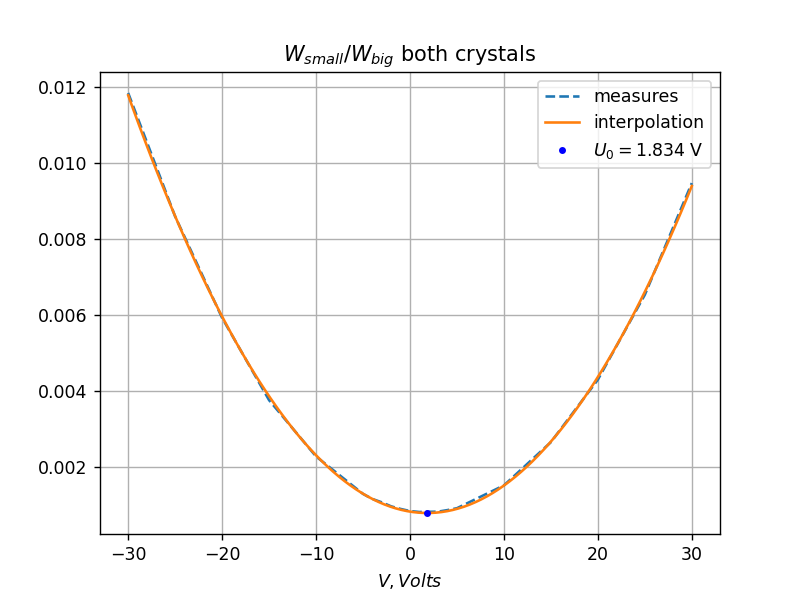

In [12]:
%matplotlib notebook
d_U, alpha, d_I = curve_fit(g, angles['both'], (W_small['both']/W_big['both']))[0]
#d_U, alpha, d_I = curve_fit(g, angles['both'], (W_small['both']))[0]

print(d_U, alpha, d_I)
plt.title(r'$W_{small}/W_{big}$ both crystals')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles['both']), np.max(angles['both']), 100)
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles['both'], (W_small['both']/W_big['both']), '--', label='measures')
plt.plot(V_int, g(V_int, d_U, alpha, d_I), label='interpolation')
plt.plot(d_U, d_I, '.', color='blue', label=r'$U_0={0:4.3f}$ V'.format(d_U))
plt.grid()
plt.legend()
plt.savefig('both_signal')

<IPython.core.display.Javascript object>


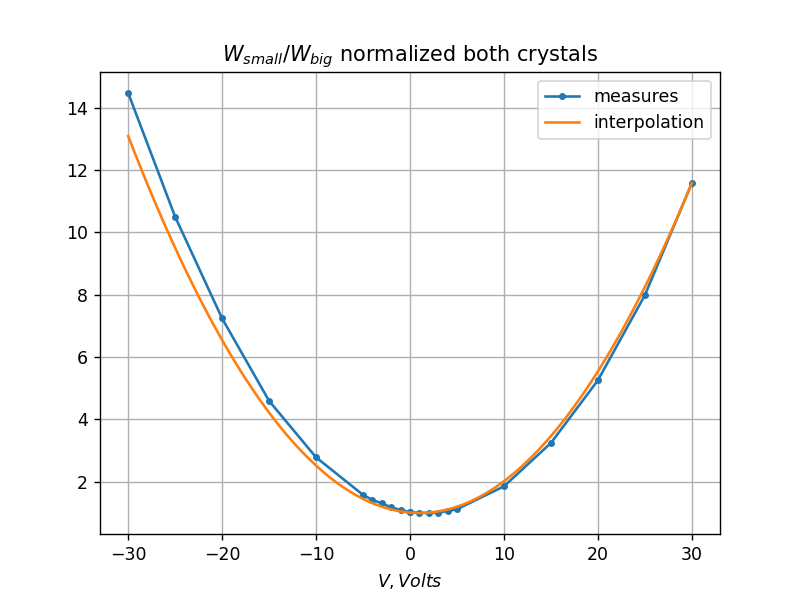

In [152]:
%matplotlib notebook
plt.title(r'$W_{small}/W_{big}$ normalized both crystals')
plt.xlabel(r'$V, Volts$')\
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles['both'], (W_small['both']/W_big['both'])/np.min(W_small['both']/W_big['both']), '.-', label='measures')
plt.plot(V_int, g(V_int, d_U, alpha, d_I)/np.min(g(angles['both'], d_U, alpha, d_I)), label='interpolation')
plt.grid()
plt.legend()
plt.savefig('both_signal_normalized')

0.998302805205322 297.0908985627609 0.0002252182819764502


<IPython.core.display.Javascript object>


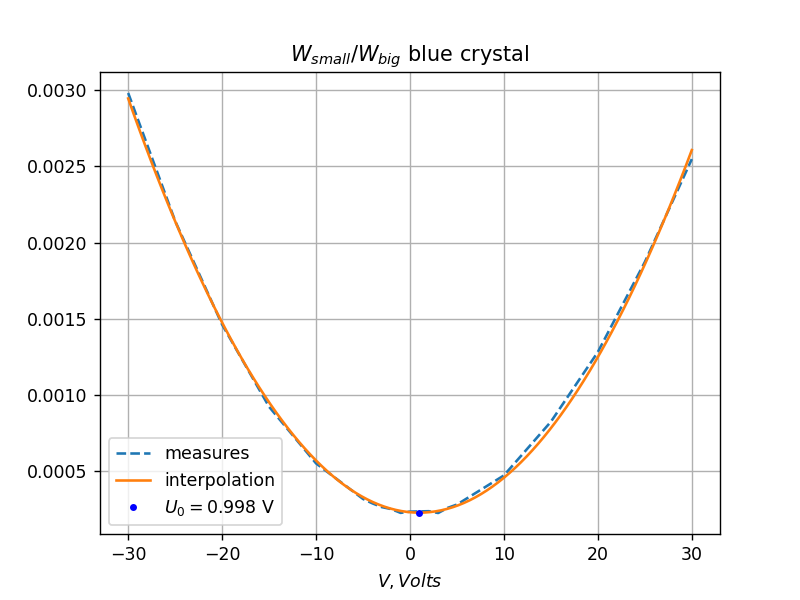

In [150]:
%matplotlib notebook
d_U, alpha, d_I = curve_fit(g, angles['blue'], (W_small['blue']/W_big['blue']))[0]
print(d_U, alpha, d_I)
plt.title(r'$W_{small}/W_{big}$ blue crystal')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles['blue']), np.max(angles['blue']), 100)
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles['blue'], (W_small['blue']/W_big['blue']), '--', label='measures')
plt.plot(V_int, g(V_int, d_U, alpha, d_I), label='interpolation')
plt.plot(d_U, d_I, '.', color='blue', label=r'$U_0={0:4.3f}$ V'.format(d_U))
plt.grid()
plt.legend()
plt.savefig('blue_signal')

<IPython.core.display.Javascript object>


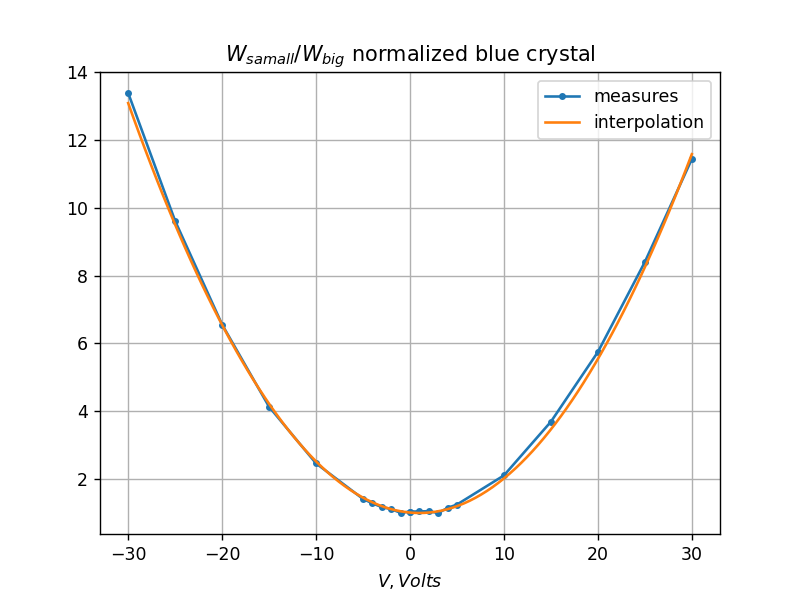

In [151]:
%matplotlib notebook
plt.title(r'$W_{samall}/W_{big}$ normalized blue crystal')
plt.xlabel(r'$V, Volts$')\
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles['blue'], (W_small['blue']/W_big['blue'])/np.min(W_small['blue']/W_big['blue']), '.-', label='measures')
plt.plot(V_int, g(V_int, d_U, alpha, d_I)/np.min(g(angles['blue'], d_U, alpha, d_I)), label='interpolation')
plt.grid()
plt.legend()
plt.savefig('blue_signal_normalized')

<IPython.core.display.Javascript object>


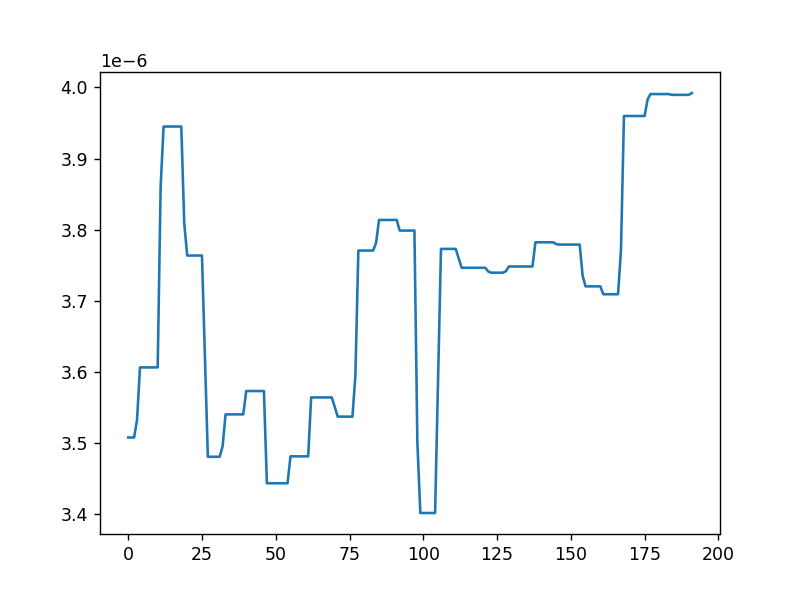

In [180]:
W= np.loadtxt('blue_-30.csv', skiprows=15, delimiter=';',
                          usecols=(3, 4), dtype='str')
W_s = W[:, 0]
W_b = W[:, 1]
for i in range(len(W_s)):
    W_s[i] = W_s[i].replace(',', '.')
for i in range(len(W_b)):
    W_b[i] = W_b[i].replace(',', '.')
W_s = W_s.astype(np.float64)
W_b = W_b.astype(np.float64)
plt.plot(np.arange(0, len(W_s)), W_s)


<IPython.core.display.Javascript object>


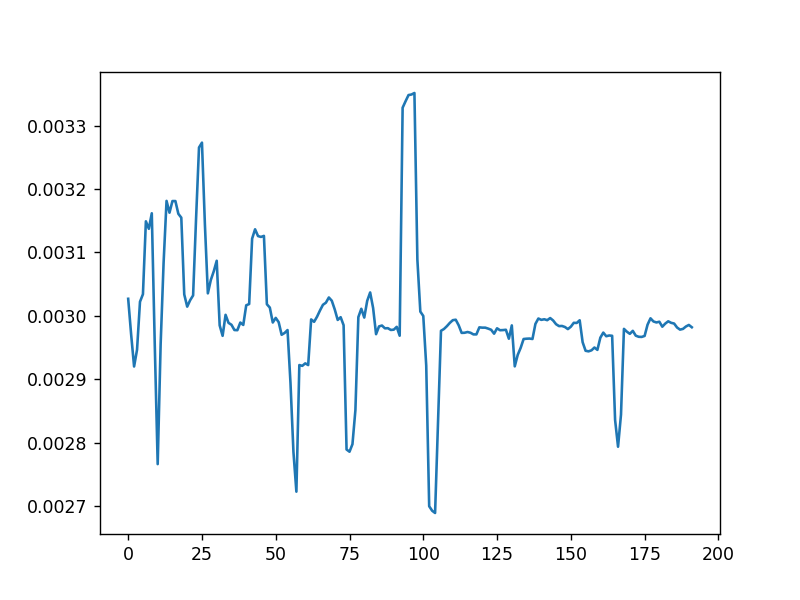

0.0029959931430640478

In [181]:

plt.plot(np.arange(0, len(W_s)), W_s/W_b)
np.average(W_s/W_b)

In [168]:
W[:,0]

array(['1.2707E-05', '1.2744E-05', '1,2771E-05', '1,3097E-05',
       '1,2652E-05', '1,3021E-05', '1,3289E-05', '1,3372E-05',
       '1,3208E-05', '1,2965E-05', '1,2905E-05', '1,2899E-05',
       '1,2774E-05', '1,2809E-05', '1,2816E-05', '1,2992E-05',
       '1,3155E-05', '1,3048E-05', '1,2998E-05', '1,292E-05',
       '1,3072E-05', '1,2858E-05', '1,2984E-05', '1,2967E-05',
       '1,3057E-05', '1,3E-05', '1,3012E-05', '1,2957E-05', '1,2932E-05',
       '1,3004E-05', '1,3004E-05', '1,2818E-05', '1,2888E-05',
       '1,2962E-05', '1,3005E-05', '1,2917E-05', '1,3032E-05',
       '1,2991E-05', '1,3112E-05', '1,2908E-05', '1,2861E-05',
       '1,2786E-05', '1,2559E-05', '1,2704E-05', '1,2646E-05',
       '1,2733E-05', '1,2709E-05', '1,2757E-05', '1,2833E-05',
       '1,2832E-05', '1,2773E-05', '1,2768E-05', '1,2978E-05',
       '1,285E-05', '1,2853E-05', '1,2831E-05', '1,2861E-05',
       '1,2623E-05', '1,2733E-05', '1,2684E-05', '1,264E-05',
       '1,2683E-05', '1,2921E-05', '1,3085E-05'

In [188]:
lam = 830e-9
L = 20e-3
no = 2.23
ne = 2.16

In [222]:
phi = np.linspace(-20e-3, 20e-3, 10**3)
dphi = 2*np.pi/lam*(no-np.sqrt(no**2*ne**2+np.sin(phi)**2*(ne**2-no**2))/ne)*L

<IPython.core.display.Javascript object>


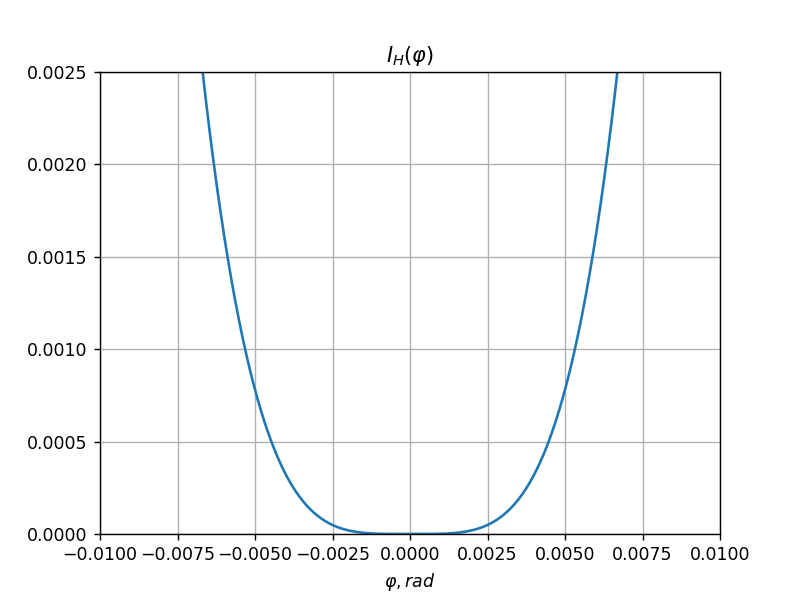

In [230]:
plt.plot(phi, np.sin(dphi/2)**2)
plt.title(r'$I_H(\varphi)$')
plt.xlabel(r'$\varphi, rad$')
#plt.yscale('log')
plt.ylim(0, 2.5e-3)
plt.xlim(-0.010, 0.010)
plt.grid()
plt.savefig('I_phi')


<IPython.core.display.Javascript object>


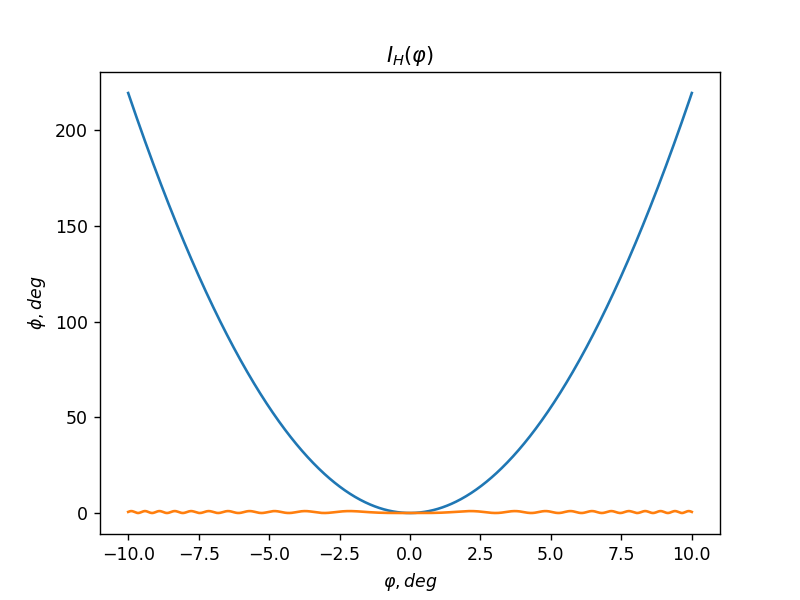

Text(0, 0.5, '$\\phi, deg$')

In [208]:
plt.plot(phi, np.abs(dphi))
plt.title('Разность фаз в зависимости от угла падения')
plt.xlabel(r'$\varphi, deg$')
plt.ylabel(r'$\phi, deg$')